In [65]:
                                        # Stats in Criminality

# -*- coding: utf-8 -*-
"""
Created on Wed Feb  5 14:10:14 2025

@author: cheikh
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report





In [76]:
# Vue d'ensemble des données 
print(df.head())  
print(df.info())  
print(df.describe())  
print(df.isnull().sum())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

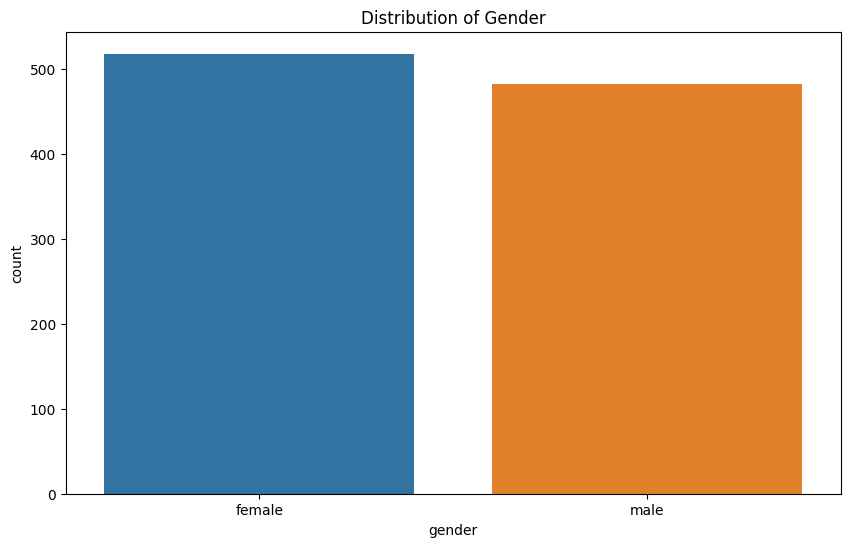

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


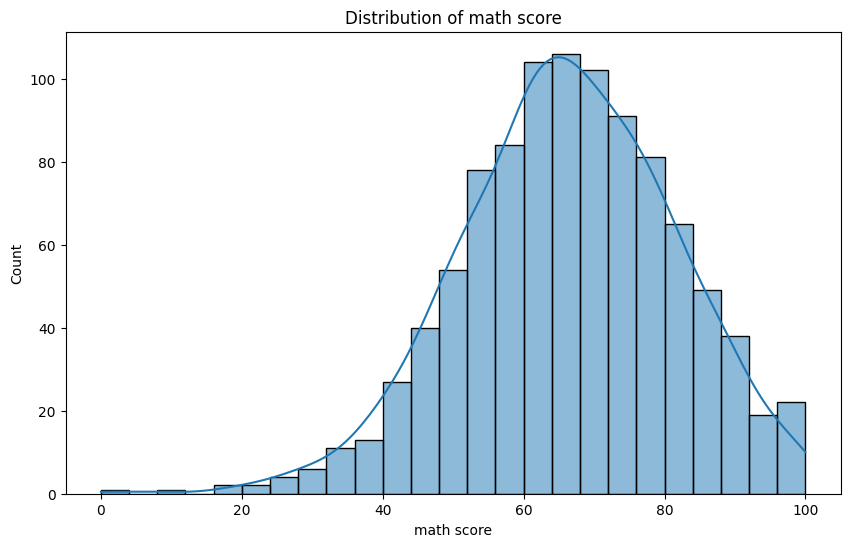

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


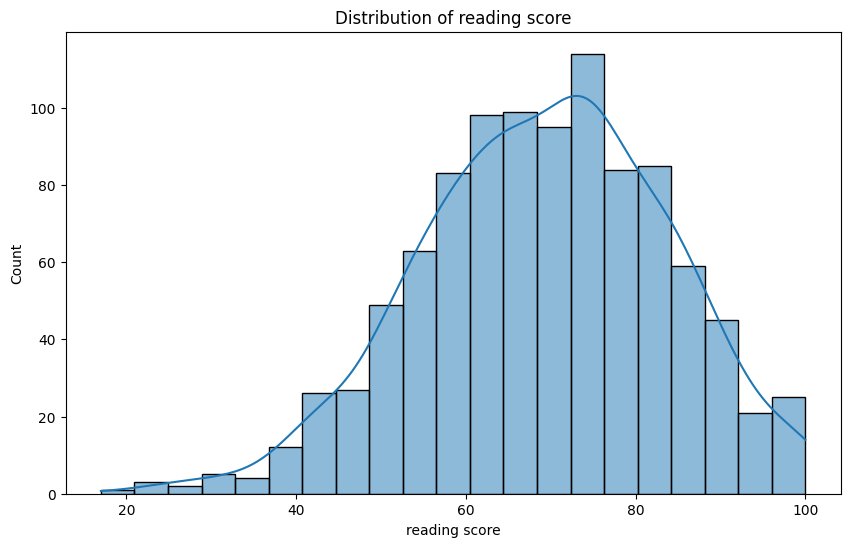

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


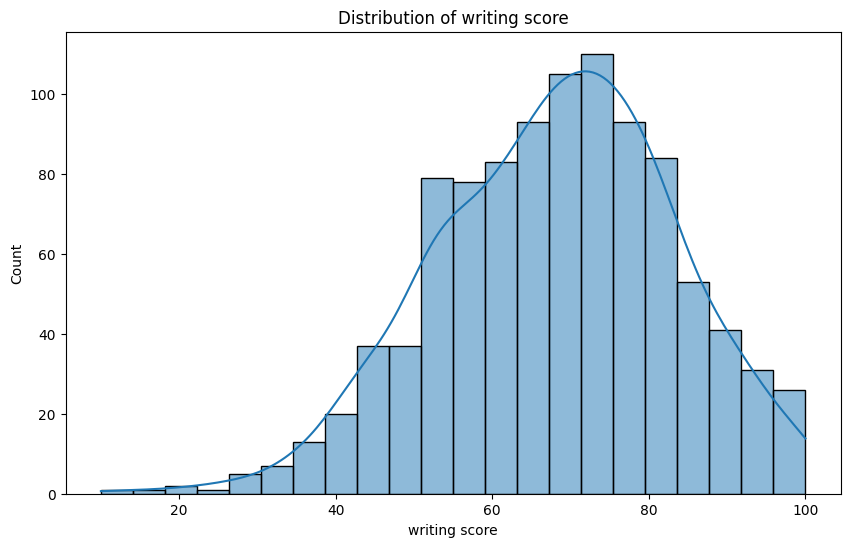

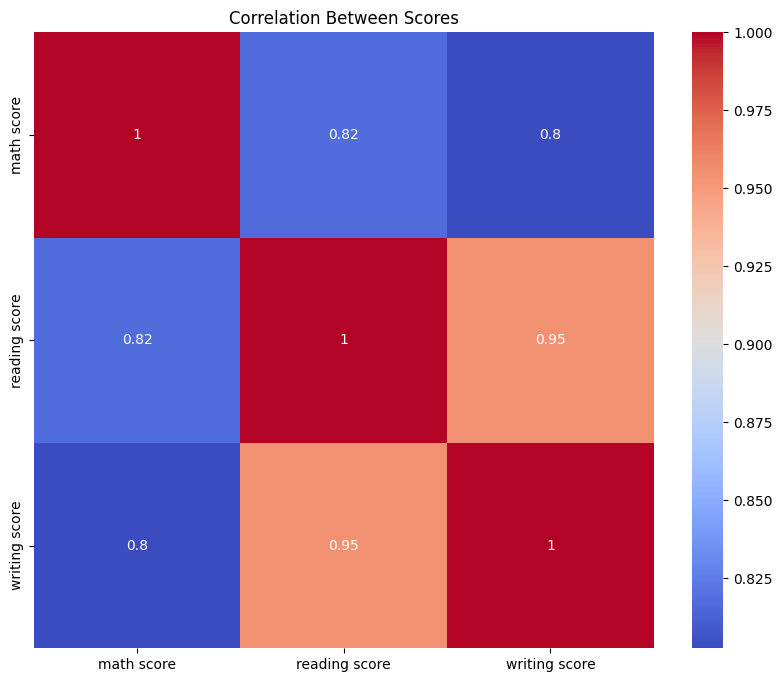

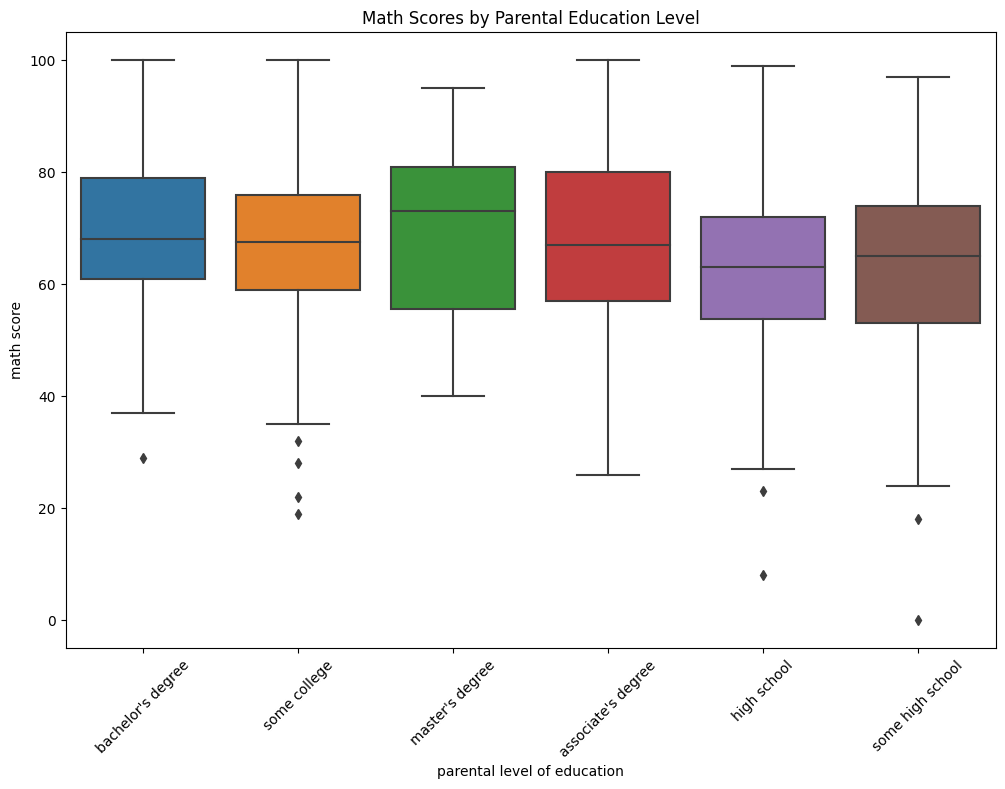

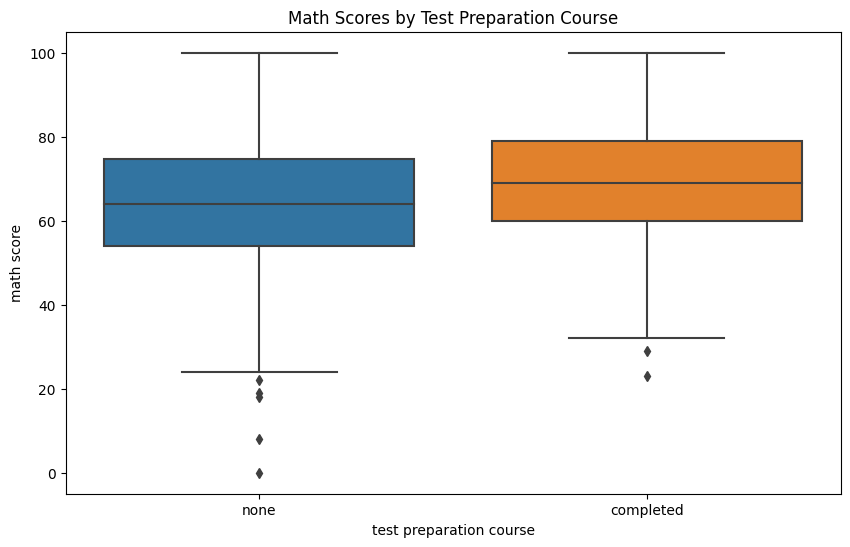

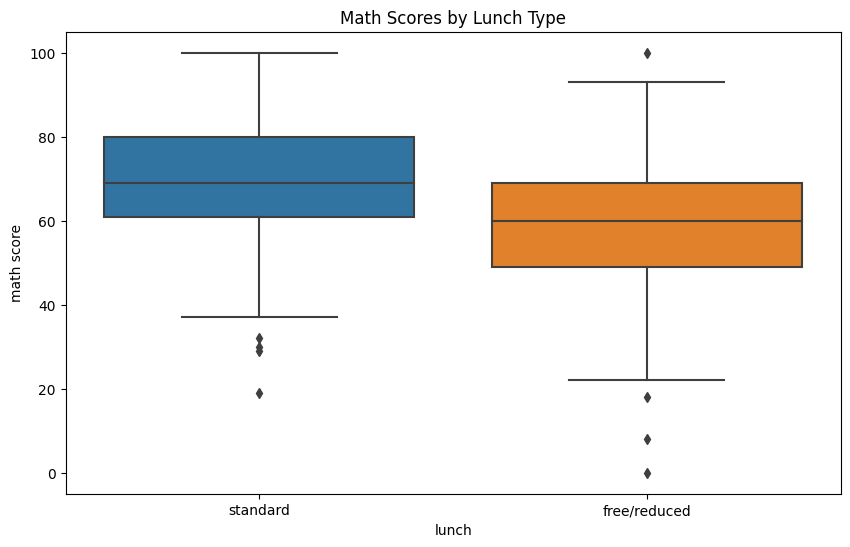

In [77]:
# Distribution par genre
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Score par sujet
subjects = ['math score', 'reading score', 'writing score']
for subject in subjects:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[subject], kde=True)
    plt.title(f'Distribution of {subject}')
    plt.xlabel(subject)
    plt.show()

# Corrélation entre scores
correlation = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')
plt.show()

# Impact des parents sur les résulats
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math Scores by Parental Education Level')
plt.show()

# Impact de la préparation sur les résultats
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Math Scores by Test Preparation Course')
plt.show()

# Relation entre lunch et scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Math Scores by Lunch Type')
plt.show()


  race/ethnicity  math score  reading score  writing score
0        group A   61.629213      64.674157      62.674157
1        group B   63.452632      67.352632      65.600000
2        group C   64.463950      69.103448      67.827586
3        group D   67.362595      70.030534      70.145038
4        group E   73.821429      73.028571      71.407143


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

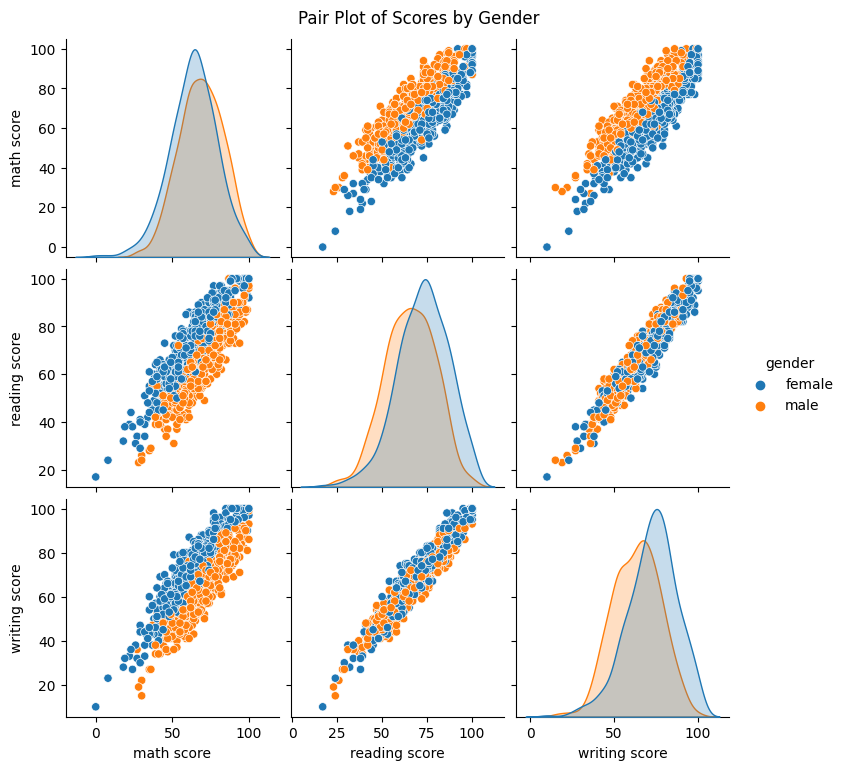

In [80]:
ethnicity_scores = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().reset_index()
print(ethnicity_scores)

# Matrice de la relation entre toutes els variables numérique
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender', diag_kind="kde")
plt.suptitle('Pair Plot of Scores by Gender', y=1.02)
plt.show()

# Variables catégorielles
df_with_dummies = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])